# mpra_analyze_SL

Margaret Guo

12/10/2020

In [1]:
library(MPRAnalyze)
library(tidyverse)
library(pheatmap)
# library(mpra)
# library(QuASAR)
# library(BiocParallel)
# library(stringr)
# library(reshape2)
# library(ggplot2)
# library(gridExtra)
# library(VennDiagram)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
getwd()

[1] "/Users/mguo123/Google Drive/1_khavari/noncancer_project/miseq/novogene_071420"

In [3]:
list.files(getwd())

[1] "1A1_mpra_analyze_293T-nobatch.ipynb"                            
  [2] "1A2_mpra_analyze_AST-nobatch.ipynb"                             
  [3] "1A3_mpra_analyze_H9D0-nobatch.ipynb"                            
  [4] "1B1_mpra_analyze_293T.ipynb"                                    
  [5] "1B2_mpra_analyze_AST-batch1.ipynb"                              
  [6] "1B2_mpra_analyze_AST.ipynb"                                     
  [7] "1B3_mpra_analyze_H9D0.ipynb"                                    
  [8] "1B4_mpra_analyze_H9D2.ipynb"                                    
  [9] "1B5_mpra_analyze_H9D4.ipynb"                                    
 [10] "1B6_mpra_analyze_H9D10.ipynb"                                   
 [11] "1B7_mpra_analyze_SL.html"                                       
 [12] "1B7_mpra_analyze_SL.ipynb"                                      
 [13] "1B8_mpra_analyze_SLC.ipynb"                                     
 [14] "1C1_mpra_analyze_293T-dedup.ipynb"                              
 [15] "1C2_mpra_analyze_AST-dedup.ipynb"                               
 [16] "1C3_mpra_analyze_H9D0-dedup.ipynb"                              
 [17] "1C4_mpra_analyze_H9D2-dedup.ipynb"                              
 [18] "1C5_mpra_analyze_H9D4-dedup.ipynb"                              
 [19] "1C6_mpra_analyze_H9D10-dedup.ipynb"                             
 [20] "1C7_mpra_analyze_SL-dedup.ipynb"                                
 [21] "1C8_mpra_analyze_SLC-dedup.ipynb"                               
 [22] "1D1_mpra_analyze_293T-dedup-barcodeallele.ipynb"                
 [23] "1D2_mpra_analyze_AST-dedup-barcodeallele.ipynb"                 
 [24] "1D3_mpra_analyze_H9D0-dedup-barcodeallele.ipynb"                
 [25] "1D4_mpra_analyze_H9D2-dedup-barcodeallele.ipynb"                
 [26] "1D5_mpra_analyze_H9D4-dedup-barcodeallele.ipynb"                
 [27] "1D6_mpra_analyze_H9D10-dedup-barcodeallele.ipynb"               
 [28] "1D7_mpra_analyze_SL-dedup-barcodeallele.ipynb"                  
 [29] "1D8_mpra_analyze_SLC-dedup-barcodeallele.ipynb"                 
 [30] "2_mpra_gene_analysis.ipynb"                                     
 [31] "2B_mpra_gene_analysis2.ipynb"                                   
 [32] "2BR_mpra_gene_analysis2.ipynb"                                  
 [33] "2C_mpra_gene_analysis-barcodeallele.ipynb"                      
 [34] "2D_mpra_gene_analysis2-barcodeallele.ipynb"                     
 [35] "2DR_mpra_gene_analysis2-barcodeallele.ipynb"                    
 [36] "3_get_cgenes.ipynb"                                             
 [37] "3R_cgene_R.ipynb"                                               
 [38] "4_cmap_egenes.ipynb"                                            
 [39] "4_motifBreakR_analysis.nb.html"                                 
 [40] "4_motifBreakR_analysis.R"                                       
 [41] "4_motifBreakR_analysis.Rmd"                                     
 [42] "4_mpra_enrichment.ipynb"                                        
 [43] "4_run_stams_psychmpra_res.nb.html"                              
 [44] "4_run_stams_psychmpra_res.Rmd"                                  
 [45] "4B_mpra_enrichment_goterm_compare.ipynb"                        
 [46] "5_allele_specific_analyses.ipynb"                               
 [47] "6_GWAS_enrichment.ipynb"                                        
 [48] "6R_GWAS_enrichment.ipynb"                                       
 [49] "8A_common_genes.html"                                           
 [50] "B_mpraanalyze_bc_plus_allele"                                   
 [51] "cmap_egenes"                                                    
 [52] "common_dz.csv"                                                  
 [53] "Copy of NovoLibrarySIF Stanford-NVUS2020061523_DLR_6.18.20.xlsx"
 [54] "corr_lanecol.pdf"                                               
 [55] "corr_lanecollapse.csv"                                          
 [56] "corr.csv"                          

In [4]:
count_rna = read.csv('dedup_counts/count_matrix.csv',row.names=1)
head(count_rna)

,AST_1_L1,AST_1_L2,AST_2_L1,AST_2_L2,H4_D4_1_L1,H4_D4_1_L2,H9_D0_1A_L1,H9_D0_1A_L2,H9_D0_1B_L1,H9_D0_1B_L2,⋯,SL_1_L1,SL_1_L2,SL_2_L1,SL_2_L2,SL_3A_L1,SL_3A_L2,SL_3B_L1,SL_3B_L2,SL_4_L1,SL_4_L2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr5.109076112.Ref.C.3,151,138,97,72,141,143,22,17,30,33,⋯,43,40,88,61,40,32,33,28,61,55
chr10.62185494.Ref.C.7,60,52,61,50,42,41,17,19,11,9,⋯,39,33,21,25,23,13,31,32,34,36
chr2.74455472.all_alt.T.6,529,428,104,89,332,314,119,115,106,101,⋯,193,149,163,164,107,77,131,110,232,210
chr6.27799470.all_alt.G.9,404,377,180,159,236,207,74,76,52,45,⋯,88,79,96,87,59,37,82,67,88,90
chr11.47270255.all_alt.T.8,76,76,54,41,62,49,21,17,13,8,⋯,25,23,34,34,42,39,37,38,21,19
chr10.107594646.Ref.G.10,306,276,48,52,186,181,30,26,23,26,⋯,65,57,91,82,57,53,12,9,82,84


In [5]:
colnames(count_rna)

[1] "AST_1_L1"    "AST_1_L2"    "AST_2_L1"    "AST_2_L2"    "H4_D4_1_L1" 
 [6] "H4_D4_1_L2"  "H9_D0_1A_L1" "H9_D0_1A_L2" "H9_D0_1B_L1" "H9_D0_1B_L2"
[11] "H9_D0_2_L1"  "H9_D0_2_L2"  "H9_D10_1_L1" "H9_D10_1_L2" "H9_D10_2_L1"
[16] "H9_D10_2_L2" "H9_D10_3_L1" "H9_D10_3_L2" "H9_D10_4_L1" "H9_D10_4_L2"
[21] "H9_D2_1_L1"  "H9_D2_1_L2"  "H9_D2_2_L1"  "H9_D2_2_L2"  "H9_D2_3_L1" 
[26] "H9_D2_3_L2"  "H9_D2_4_L1"  "H9_D2_4_L2"  "H9_D4_2_L1"  "H9_D4_2_L2" 
[31] "H9_D4_3A_L1" "H9_D4_3A_L2" "H9_D4_3B_L1" "H9_D4_3B_L2" "HEK293_1_L1"
[36] "HEK293_1_L2" "HEK293_2_L1" "HEK293_2_L2" "HEK293_3_L1" "HEK293_3_L2"
[41] "SLC_1_L1"    "SLC_1_L2"    "SLC_2_L1"    "SLC_2_L2"    "SLC_3_L1"   
[46] "SLC_3_L2"    "SLC_4_L1"    "SLC_4_L2"    "SL_1_L1"     "SL_1_L2"    
[51] "SL_2_L1"     "SL_2_L2"     "SL_3A_L1"    "SL_3A_L2"    "SL_3B_L1"   
[56] "SL_3B_L2"    "SL_4_L1"     "SL_4_L2"

In [6]:
get_tables = function(miseq_out){
miseq_out$id = as.character(miseq_out$id)
miseq_out = miseq_out%>%
    select(id, count)%>%
    separate(id, c("chr", "loc", "allele_info", "letter", "bc_id"), sep='[.]')%>%
    mutate(allele = ifelse(grepl("Ref",miseq_out$id),'ref','alt'))%>%
    mutate(column = str_c(allele, bc_id, sep = '_'))%>%
    mutate(snp_name = str_c(chr, loc, sep = '_'))%>%
    select(snp_name, count, column, allele, bc_id )%>%
    group_by(snp_name, column)%>%
    summarise(count = sum(count),
            allele = unique(allele),
            bc_id = unique(bc_id))%>%
    ungroup()

    colAnnon = miseq_out%>%
        select( -snp_name,-count)%>%
        mutate(barcode_allelic =  as.factor(str_c(allele, bc_id, sep = '_')))%>%
        distinct()%>%
        arrange(column)%>%
        column_to_rownames('column')
    
    countTable = miseq_out%>%
        select(-allele, -bc_id)%>%
        spread(column,count)%>%
        replace(is.na(.), 0)%>%
        arrange(snp_name)%>%
        column_to_rownames('snp_name')
#     countTable = as.matrix(countTable)
    return(list(colAnnon, countTable))
}

get_tables_withbatch = function(miseq_out){
miseq_out$id = as.character(miseq_out$id)
miseq_out = miseq_out%>%
    select(id, count,batch)%>%
    separate(id, c("chr", "loc", "allele_info", "letter", "bc_id"), sep='[.]')%>%
    mutate(allele = ifelse(grepl("Ref",miseq_out$id),'ref','alt'))%>%
    mutate(column = str_c(allele, bc_id, batch, sep = '_'))%>%
    mutate(snp_name = str_c(chr, loc, sep = '_'))%>%
    select(snp_name, count, column, allele, bc_id, batch )%>%
    group_by(snp_name, column, batch)%>%
    summarise(count = sum(count),
            allele = unique(allele),
            bc_id = unique(bc_id))%>%
    ungroup()

    colAnnon = miseq_out%>%
        select( -snp_name,-count)%>%
        mutate(barcode_allelic =  as.factor(str_c(allele, bc_id, sep = '_')))%>%
        distinct()%>%
        arrange(column)%>%
        column_to_rownames('column')

    countTable = miseq_out%>%
        select(-allele, -bc_id, -batch)%>%
        spread(column,count)%>%
        replace(is.na(.), 0)%>%
        arrange(snp_name)%>%
        column_to_rownames('snp_name')
#     countTable = as.matrix(countTable)

    return(list(colAnnon, countTable))
}

# read_rna_count_csv = function(rna_count_csv){
    
# }

In [7]:
# read in dna
dna_df = read.csv('../miseq_mg_081019/libpsych_plasmid_qc_701_501_count.csv')
result_dna = get_tables(dna_df)
colAnnon_dna = result_dna[[1]]
dnaCount = result_dna[[2]]

In [8]:
colAnnon_dna

,allele,bc_id,barcode_allelic
,<chr>,<chr>,<fct>
alt_1,alt,1,alt_1
alt_10,alt,10,alt_10
alt_2,alt,2,alt_2
alt_3,alt,3,alt_3
alt_4,alt,4,alt_4
alt_5,alt,5,alt_5
alt_6,alt,6,alt_6
alt_7,alt,7,alt_7
alt_8,alt,8,alt_8


### IMPORTANT ADD IN TISSUE SPECIFIC INFO BELOW

#### HEK293T
save_prefix = 'mpraanalyze_HEK293_'
sample_ids = c('HEK293_1', 'HEK293_2', 'HEK293_3')

#### Astrocytes (AST)
save_prefix = 'mpraanalyze_AST1_'
sample_ids = c('AST_1', 'AST_2')

#### H9-D0
save_prefix = 'mpraanalyze_H9D0_'
sample_ids = c('H9_D0_1A', 'H9_D0_1B', 'H9_D0_2')


#### H9-D2
save_prefix = 'mpraanalyze_H9D2_'
sample_ids = c('H9_D2_1', 'H9_D2_2', 'H9_D2_3', 'H9_D2_4')


#### H9-D4 (removed H9_D4_3A because of clustering issues)
save_prefix = 'mpraanalyze_H9D4_'
sample_ids = c('H4_D4_1', 'H9_D4_2', 'H9_D4_3B')


#### H9-D10 (removed H9_D10_2 because of clustering issues)
save_prefix = 'mpraanalyze_H9D10_'
sample_ids = c('H9_D10_1', 'H9_D10_4', 'H9_D10_3')


#### SL
save_prefix = 'mpraanalyze_SL_'
sample_ids = c('SL_1', 'SL_2', 'SL_3A', 'SL_3B', 'SL_4')


#### SLC
save_prefix = 'mpraanalyze_SLC_'
sample_ids = c('SLC_1', 'SLC_2', 'SLC_3',  'SLC_4)


In [9]:
#### SL
save_prefix = 'D_mpraanalyze_barcode_allelic/mpraanalyze_SL_'
sample_ids = c('SL_1', 'SL_2', 'SL_3A', 'SL_3B', 'SL_4')
tissue = 'SL'

In [10]:
rna_df= data.frame()
for (sample_id in sample_ids){
    # read in each lane
    rna_df_rep_L1 = read.csv(paste0('dedup_counts/',sample_id,  '_L1_libpsych_virus_dupumi_count.csv'))
    rna_df_rep_L1 = dplyr::select(rna_df_rep_L1, id, count)
    rna_df_rep_L2 = read.csv(paste0('dedup_counts/',sample_id,  '_L2_libpsych_virus_dupumi_count.csv'))
    rna_df_rep_L2 = dplyr::select(rna_df_rep_L2, id, count)
    
    # merge lanes by summing and add a variable indicating batch
    rna_df_rep = full_join(rna_df_rep_L1,rna_df_rep_L2,by='id')
    rna_df_rep$count.x[is.na(rna_df_rep$count.x)] = 0 
    rna_df_rep$count.y[is.na(rna_df_rep$count.y)] = 0
    rna_df_rep$count= rna_df_rep$count.x +rna_df_rep$count.y
    rna_df_rep$batch= tail(strsplit(sample_id,'_')[[1]],n=1)
    
    #add to overall dataframe
    rna_df = rbind(rna_df, rna_df_rep)
    
}



Warning message:
“Column `id` joining factors with different levels, coercing to character vector”
Warning message:
“Column `id` joining factors with different levels, coercing to character vector”
Warning message:
“Column `id` joining factors with different levels, coercing to character vector”
Warning message:
“Column `id` joining factors with different levels, coercing to character vector”
Warning message:
“Column `id` joining factors with different levels, coercing to character vector”


In [11]:
# get overall dataframe and annotations

result_rna = get_tables_withbatch(rna_df)
colAnnon_rna = result_rna[[1]]
rnaCount = result_rna[[2]]


result_rna_nobatch = get_tables(rna_df)
colAnnon_rna_nobatch = result_rna_nobatch[[1]]
rnaCount_nobatch = result_rna_nobatch[[2]]

In [12]:
snp="chr3_50374568"
rnaCount_nobatch[snp,]
log(sum(as.matrix(rnaCount_nobatch[snp,])[,11:20])/sum(as.matrix(rnaCount_nobatch[snp,])[,1:10]))# log ref/alt
#1.201612 reported 

,alt_1,alt_10,alt_2,alt_3,alt_4,alt_5,alt_6,alt_7,alt_8,alt_9,ref_1,ref_10,ref_2,ref_3,ref_4,ref_5,ref_6,ref_7,ref_8,ref_9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr3_50374568,5,0,9,4,27,111,19,9,0,0,0,61,0,0,0,17,78,0,0,68


[1] 0.1967103

In [15]:
# filter dna for those found in rna
dnaCount_new = dnaCount %>% 
    rownames_to_column('snpname') %>%
    filter(row.names(dnaCount) %in% row.names(rnaCount))%>%
    column_to_rownames('snpname')

# filter rna for those found in dna
rnaCount_new = rnaCount %>% 
    rownames_to_column('snpname') %>%
    filter(row.names(rnaCount) %in% row.names(dnaCount_new))%>%
    column_to_rownames('snpname')


# filter rna for those found in dna
rnaCount_nobatch_new = rnaCount_nobatch %>% 
    rownames_to_column('snpname') %>%
    filter(row.names(rnaCount_nobatch) %in% row.names(dnaCount_new))%>%
    column_to_rownames('snpname')
rnaCount_nobatch_new = rnaCount_nobatch_new[rownames(dnaCount_new),colnames(dnaCount_new)]

In [16]:
dim(dnaCount)
dim(rnaCount)
dim(dnaCount_new)
dim(rnaCount_new)
dim(rnaCount_nobatch_new)

[1] 2219   20

[1] 2206  100

[1] 2206   20

[1] 2206  100

[1] 2206   20

In [17]:
colAnnon_dna

,allele,bc_id,barcode_allelic
,<chr>,<chr>,<fct>
alt_1,alt,1,alt_1
alt_10,alt,10,alt_10
alt_2,alt,2,alt_2
alt_3,alt,3,alt_3
alt_4,alt,4,alt_4
alt_5,alt,5,alt_5
alt_6,alt,6,alt_6
alt_7,alt,7,alt_7
alt_8,alt,8,alt_8


# MPRAnalyze

In [18]:
# create MpraObject
obj <- MpraObject(dnaCounts = as.matrix(dnaCount_new), rnaCounts = as.matrix(rnaCount_new), 
                  dnaAnnot = colAnnon_dna, rnaAnnot = colAnnon_rna)

In [20]:
# ## Data Normalization
# ## If the library factors are different for the DNA and RNA data, separate 
# ## estimation of these factors is needed. We can also change the estimation 
# ## method (Upper quartile by default)
obj <- estimateDepthFactors(obj, #lib.factor = c("allele", "bc_id"),
                            which.lib = "dna", 
                            depth.estimator = "uq")

obj <- estimateDepthFactors(obj, lib.factor = c("batch"),#lib.factor = c("allele"),
                            which.lib = "rna", 
                            depth.estimator = "uq")
# obj <- estimateDepthFactors(obj, lib.factor = c("allele"),
#                             which.lib = "rna", 
#                             depth.estimator = "uq")


## Quantitative Analysis
These estimates can then be used to identify and classify SNPs that induce a higher transcription rate (ASE aka Allele specific expression)

In [21]:
# obj <- analyzeQuantification(obj = obj, 
#                               dnaDesign = ~ bc_id + allele,
#                               rnaDesign = ~ allele+batch)

We can now extract the transcription rate estimates from the model, denoted ‘alpha values’ in the MPRAnalyze model, and use the testing functionality to test for activtiy. extracting alpha values is done with the getAlpha function, that will provide separate values per-factor if a factor is provided. In this case we want a separate alpha estimate by condition:

In [22]:
# ##extract alpha values from the fitted model
# alpha <- getAlpha(obj, by.factor = "allele")
# ##visualize the estimates
# par(bg='white')
# boxplot(alpha)

## Comparative Analysis
MPRAnalyze also supports comparative analyses, in this case: identifying enhancers that are differentially active between conditions. While we can do this indirectly by taking the quantification results and identify enhancers that are active in one condition but not the other, a direct compartive analysis is more sensitive, and allows identification of enhancers that are more or less active, avoiding the binarization of activity. MPRAnalyze also leverages negative controls to estbalish the null differential behavior, thereby correcting any systemic bias that may be present in the data. In terms of syntax, this analysis is done very similarly to quantification, with an additional reduced model that describes the null hypothesis. In this case, the null hypothesis is no differential activtiy between conditions, so the reduced model is an empty model (intercept only)

2212 steps for model takes around ~5-10 min to run

In [23]:
ptm <- proc.time()
obj <- suppressMessages(analyzeComparative(obj = obj, 
                          dnaDesign = ~ barcode_allelic,
                          rnaDesign = ~ allele, 
                          reducedDesign = ~ 1))
proc.time() - ptm
##

    user   system  elapsed 
1586.717   27.880 1623.199 

In [24]:
# with the fitted model, we can now test for differential activity, by calling testLrt
res <- testLrt(obj)

Performing Likelihood Ratio Test...



In [25]:
head(res)
summary(res)

,statistic,pval,fdr,df.test,df.dna,df.rna.full,df.rna.red,logFC
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
chr1_111243375,3.341834e+00,0.06753929,0.3507406,1,20,3,2,-0.696510197
chr1_113938499,6.112115e-01,0.43433202,0.8091468,1,20,3,2,-0.221589709
chr1_11712109,-8.926295e+00,1.00000000,1.0000000,1,8,3,2,2.828592071
chr1_11831595,1.534939e+00,0.21537265,0.6090482,1,18,3,2,-0.470620462
chr1_11831756,2.255092e-05,0.99621104,1.0000000,1,19,3,2,0.001276914
chr1_11831875,2.883749e+00,0.08947746,0.4020108,1,20,3,2,0.333050155


   statistic             pval             fdr            df.test      
 Min.   :-65.2546   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:  0.1580   1st Qu.:0.1157   1st Qu.:0.4623   1st Qu.:1.0000  
 Median :  0.7438   Median :0.3885   Median :0.7766   Median :1.0000  
 Mean   :  2.2733   Mean   :0.4231   Mean   :0.6714   Mean   :0.9873  
 3rd Qu.:  2.4741   3rd Qu.:0.6911   3rd Qu.:0.9202   3rd Qu.:1.0000  
 Max.   :160.5683   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
                                                                      
     df.dna       df.rna.full      df.rna.red     logFC         
 Min.   : 3.00   Min.   :2.000   Min.   :2    Min.   :-7.73040  
 1st Qu.:17.00   1st Qu.:3.000   1st Qu.:2    1st Qu.:-0.34810  
 Median :19.00   Median :3.000   Median :2    Median :-0.06123  
 Mean   :17.64   Mean   :2.987   Mean   :2    Mean   :-0.08338  
 3rd Qu.:20.00   3rd Qu.:3.000   3rd Qu.:2    3rd Qu.: 0.23550  
 Max.   :21.00   Max.   :3.000   Max.   :2

In [26]:
# for filtering out the snps with < 5 bc
bc_filt_num = 3
rna_df_up_filt = rna_df%>%
    separate(id, c("chr", "loc", "allele_info", "letter", "bc_id"), sep='[.]')%>%
    group_by(chr,loc, allele_info, letter)%>%
    summarise(num_bc = n())%>%
    ungroup()%>%
    filter(num_bc>bc_filt_num) %>%
    mutate(snp_name = str_c(chr, loc, sep = '_'))
snp_names_up_filt = rna_df_up_filt$snp_name
length(snp_names_up_filt)

[1] 4294

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00   28.00   38.00   35.06   44.00   50.00 

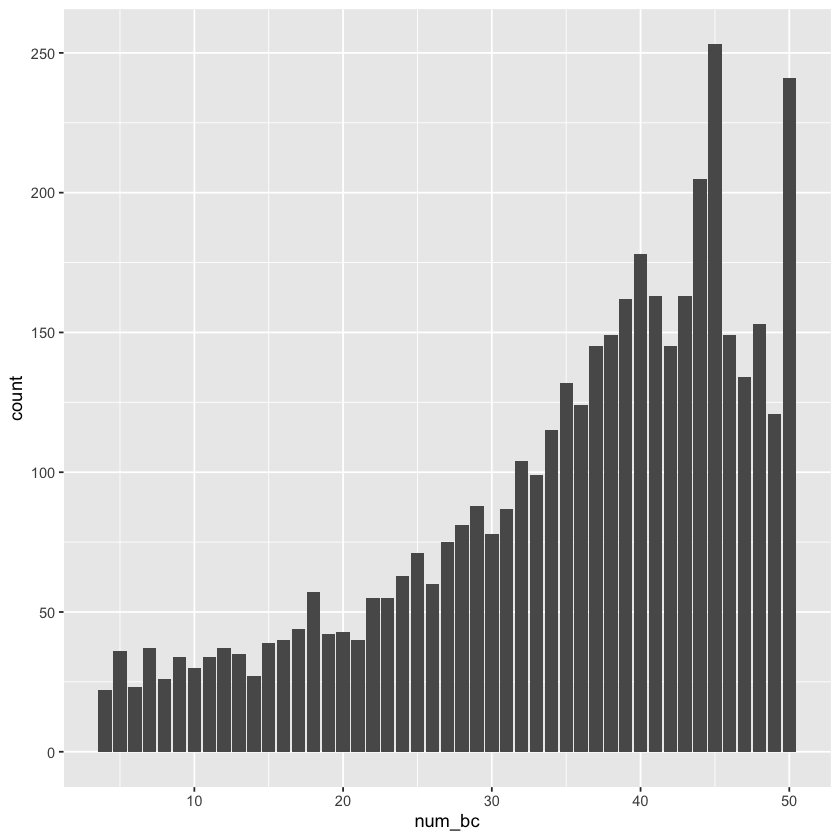

In [27]:
summary(rna_df_up_filt$num_bc)
ggplot(rna_df_up_filt,aes(x=num_bc))+geom_bar()

In [28]:
# # METHOD 1 dna normalized fold change
# res$normalt = log2(rowSums(rnaCount_nobatch_new[,1:10]+1)/rowSums(dnaCount_new[,1:10]+1))
# res$normref = log2(rowSums(rnaCount_nobatch_new[,11:20]+1)/rowSums(dnaCount_new[,11:20]+1))
# res$logFC = log2(res$normalt/res$normref)

#METHOD 2: just log2 ref/alt in rna
# res$logFC = log2(rowSums(rnaCount_nobatch_new[,1:10]+1)/rowSums(rnaCount_nobatch_new[,11:20]+1))

# # trimming
# res$pval =  pmax(res$pval, 1e-6)
# res$logFC =  pmin(res$logFC, 10)
# res$logFC =  pmax(res$logFC, 1e-6)

In [29]:
dim(res)

[1] 2206    8

In [30]:
res = res%>%
    rownames_to_column()%>%
    filter(rowname %in% snp_names_up_filt)%>%
    mutate(neglog10_p = -log10(pval))%>%
    mutate(neglog10_p_x_logFC = neglog10_p*logFC)%>%
    arrange(desc(neglog10_p_x_logFC))%>%
    drop_na()


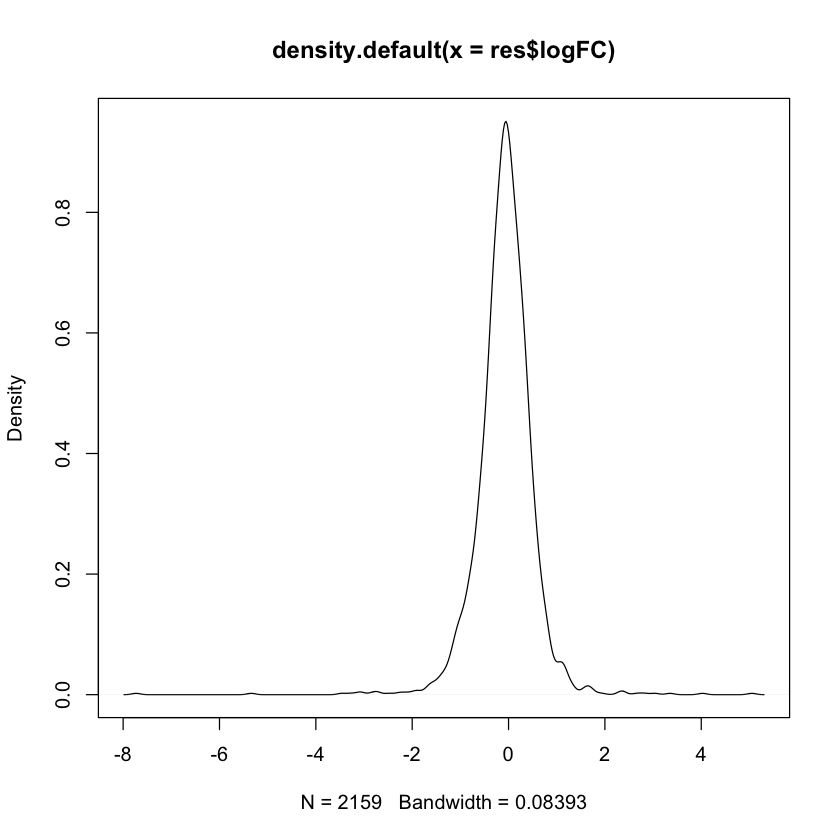

In [31]:
# When the hypothesis teseting is simple (two-condition comparison), a fold-change estimate is also available:

## plot log Fold-Change
par(bg='white')
plot(density(res$logFC))

pdf 
  2

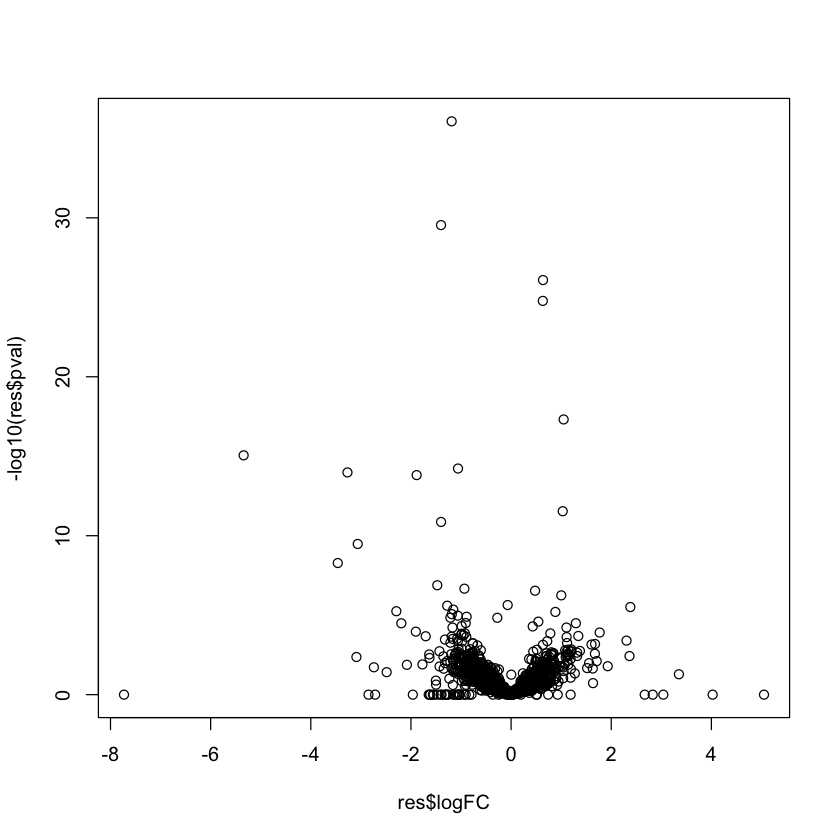

In [41]:
## plot volcano

par(bg='white')
plot(res$logFC, -log10(res$pval))

pdf(paste0(save_prefix, 'volcano.pdf'))
par(bg='white')
plot(res$logFC, -log10(res$pval))

dev.off()

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Saving 7 x 7 in image

Warning message:
“Removed 1 rows containing missing values (geom_point).”


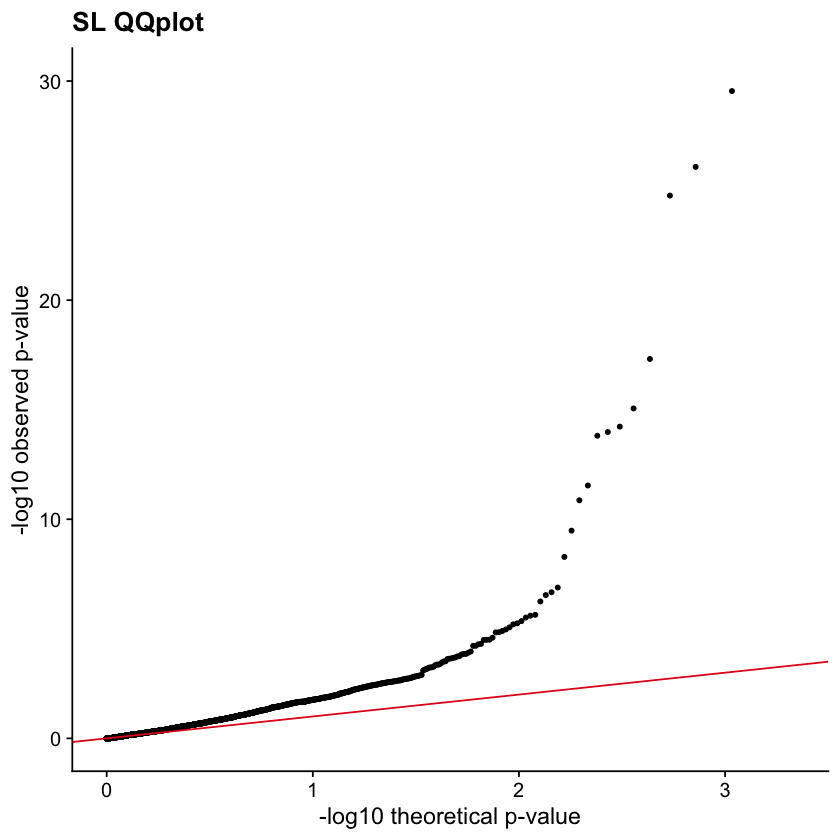

In [42]:
## plot qqplot

# pdf(paste0(save_prefix, 'volcano.pdf'))
par(bg='white')
qq_df = data.frame(emp_pval = sort(res$pval))

qq_df$theoretical_quantile = cume_dist(qq_df$emp_pval)

ggplot(qq_df, aes(x = -log10(theoretical_quantile), y = -log10(emp_pval)))+
    geom_point(size=1) +
    geom_abline(slope=1, intercept = 0, color = scales::brewer_pal(palette = "Set1")(1)[1]) +
  labs(x = "-log10 theoretical p-value", y = "-log10 observed p-value",
       title = paste0(tissue, " QQplot")) +  ylim(0, 30)+
  cowplot::theme_cowplot()
                                                        
ggsave(paste0(save_prefix, 'qqplot.pdf'))
# plot(1:length(-log10(res$pval)), -log10(res$pval))

# dev.off()

# annotate

In [43]:
lib_csv = '../../psych_lib_info.csv'
lib_df = read.csv(lib_csv)
lib_df = mutate(lib_df, name_abbr = str_c(Chr, Position, sep='_'))
head(lib_df)

,X.1,name,X,Linked_SNP,Chr,Position,Index_SNP,Disease,DHS_tissue,eGene,⋯,dbscSNV.ada_score,dbscSNV.rf_score,RawScore,PHRED,num_disease,disease_interest,pass_thres_low,pass_thres,CADD_score_bool,name_abbr
,<int>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
1,1,chr1.111243375.all_alt.G,75004,rs12085135,chr1,111243375,rs12061304,panic disorder,t-helper_17_cell,,⋯,NA,NA,-0.197208,0.728,1,TRUE,TRUE,FALSE,NA,chr1_111243375
2,2,chr1.111243375.Ref.C,75004,rs12085135,chr1,111243375,rs12061304,panic disorder,t-helper_17_cell,,⋯,NA,NA,-0.197208,0.728,1,TRUE,TRUE,FALSE,NA,chr1_111243375
3,3,chr1.113938499.all_alt.C,1977,rs74395031,chr1,113938499,rs115870915,"type 2 diabetes,Obsessive Compulsive Disorder",astrocyte_of_the_spinal_cord,NA,⋯,NA,NA,0.309426,7.336,1,TRUE,TRUE,TRUE,NA,chr1_113938499
4,4,chr1.113938499.Ref.T,1977,rs74395031,chr1,113938499,rs115870915,"type 2 diabetes,Obsessive Compulsive Disorder",astrocyte_of_the_spinal_cord,NA,⋯,NA,NA,0.309426,7.336,1,TRUE,TRUE,TRUE,NA,chr1_113938499
5,5,chr1.11712109.all_alt.T,569,rs2103665,chr1,11712109,rs115049252,schizo,spleen,NA,⋯,NA,NA,0.193843,5.751,1,FALSE,TRUE,TRUE,NA,chr1_11712109
6,6,chr1.11712109.Ref.C,569,rs2103665,chr1,11712109,rs115049252,schizo,spleen,NA,⋯,NA,NA,0.193843,5.751,1,FALSE,TRUE,TRUE,NA,chr1_11712109


In [44]:
# thres = 0.05/dim(res)[1]
res_filt = res %>%
#     filter(pval < 0.05)
    filter(fdr<0.05)
dim(res)
dim(res_filt)

[1] 2159   11

[1] 71 11

In [45]:
res_filt = res_filt %>%
    left_join(lib_df, by=c('rowname'='name_abbr'))

In [46]:
res_filt

rowname,statistic,pval,fdr,df.test,df.dna,df.rna.full,df.rna.red,logFC,neglog10_p,⋯,Sngl10000bp,dbscSNV.ada_score,dbscSNV.rf_score,RawScore,PHRED,num_disease,disease_interest,pass_thres_low,pass_thres,CADD_score_bool
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>,<lgl>,<lgl>,<lgl>
chr1_8510577,74.94562,4.838583e-18,2.134783e-15,1,10,3,2,1.0496638,17.315282,⋯,649,NA,NA,-0.148330,1.011,1,TRUE,TRUE,TRUE,NA
chr1_8510577,74.94562,4.838583e-18,2.134783e-15,1,10,3,2,1.0496638,17.315282,⋯,649,NA,NA,-0.148330,1.011,1,TRUE,TRUE,TRUE,NA
chr6_26104630,114.90814,8.242891e-27,6.061272e-24,1,14,3,2,0.6375113,26.083920,⋯,774,NA,NA,0.173411,5.440,1,FALSE,TRUE,TRUE,TRUE
chr6_26104630,114.90814,8.242891e-27,6.061272e-24,1,14,3,2,0.6375113,26.083920,⋯,774,NA,NA,0.173411,5.440,1,FALSE,TRUE,TRUE,TRUE
chr5_159602823,108.92505,1.685399e-25,9.294977e-23,1,13,3,2,0.6336823,24.773297,⋯,599,NA,NA,1.243442,14.650,1,FALSE,TRUE,FALSE,TRUE
chr5_159602823,108.92505,1.685399e-25,9.294977e-23,1,13,3,2,0.6336823,24.773297,⋯,599,NA,NA,1.243442,14.650,1,FALSE,TRUE,FALSE,TRUE
chr2_73612102,21.77607,3.063972e-06,3.379561e-04,1,4,3,2,2.3816440,5.513715,⋯,534,NA,NA,0.068726,3.743,1,FALSE,TRUE,FALSE,TRUE
chr2_73612102,21.77607,3.063972e-06,3.379561e-04,1,4,3,2,2.3816440,5.513715,⋯,534,NA,NA,0.068726,3.743,1,FALSE,TRUE,FALSE,TRUE
chr22_42466509,48.76704,2.882436e-12,6.358654e-10,1,6,3,2,1.0311710,11.540240,⋯,603,NA,NA,0.461958,9.022,1,FALSE,TRUE,TRUE,TRUE


Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Saving 7 x 7 in image

Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


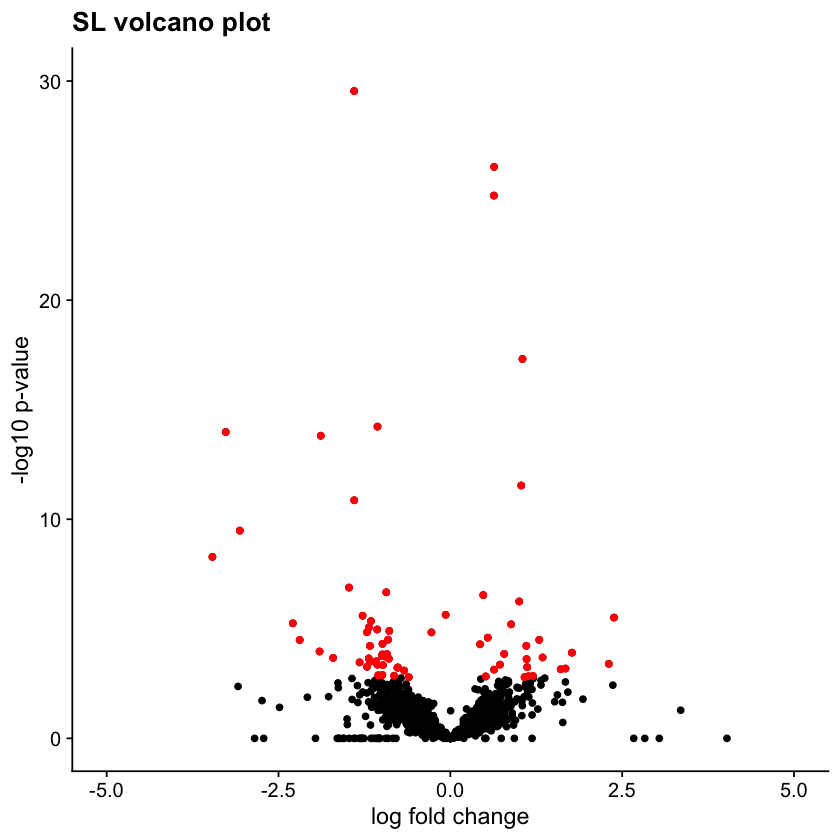

In [51]:
## plot volcano
# pdf(paste0(save_prefix, 'volcano.pdf'))
# par(bg='white')

ggplot(res, aes(x=logFC, y = -log10(pval))) + geom_point()+
 geom_point(data=res_filt, color='red')+
  labs(x = "log fold change", y = "-log10 p-value",
       title = paste0(tissue, " volcano plot")) + xlim(-5, 5)+ ylim(0,30)+
  cowplot::theme_cowplot()
# plot(res$logFC, -log10(res$pval),title(paste0(tissue, 'Volcano Plot')))
ggsave(paste0(save_prefix, 'volcano.pdf'))

# dev.off()

In [47]:
write.csv(res,paste0(save_prefix, 'comp.csv'))
write.csv(res_filt,paste0(save_prefix, 'comp_filt.csv'))


In [48]:
sort(unique(res_filt$eGene))

[1]                 acvr1b          asah1           ensg00000205246
[5] slc39a11        znf603p        
43 Levels:  abcg1 actr3c acvr1b asah1 borcs7 carm1p1 ccdc88c coro2a ... zscan9

In [49]:
sort(unique(res_filt$GeneName))

[1] AC096559.1      AF213884.2      ALMS1           ANK3           
 [5] C9orf78         CADM3           CCAR2           CTD-3035D6.2   
 [9] DGCR6           DUPD1           ENOX1           FAM109B        
[13] FUT2            FYN             GPHN            HIST1H1T       
[17] HIST1H2BL       HIST1H2BM       ITIH1           LPPR5          
[21] MPHOSPH9        MTHFR           MYO1H           NCALD          
[25] NEK1            PCDHA5          PLAA            PNMT           
[29] PNO1            PRODH           PSD3            RARB           
[33] RERE            RNU6-468P       RP11-375D13.2   RP11-99J16__A.2
[37] RP4-555D20.3    RPL35AP4        SHISA9          SMEK1          
[41] SMOX            STOML1          TMEM106B        TMEM129        
[45] TMEM63C         Z83851.3        ZDHHC5          ZMYND10        
641 Levels: ABCG1 AC002465.2 AC002480.2 AC002480.4 AC005076.5 ... ZSCAN31